RF/FSO hybrid System 

Needed Modules and Constants

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
wavelength = 1550e-9  # Wavelength in meters(prefered for longer distances or  choose 850nm)
receiver_diameter = 0.3  # Receiver diameter in meters(5 to 30 cm)
transmitter_diameter=0.1
transmit_power_FSO = 0.1 # Transmit power in watts(10 to 100mW)
transmit_power_RF=1 #1 watt power for the RF transmission
link_distances = np.linspace(0.5, 5, 50) * 1000  # Link distances in meters

# Weather conditions (0: clear, 1: rainy, 2: foggy)
weather_conditions = ['clear', 'rainy', 'foggy']
weather_attenuation = {'clear': 0.1, 'rainy': 0.5, 'foggy': 2.0}

# Threshold SNR values for switching
threshold_snr_fso = 10  # Threshold SNR for FSO in dB
threshold_snr_rf = 5  # Threshold SNR for RF in dB

# Minimum received power threshold to avoid log of zero
min_received_power = 1e-12  # 1 pW
low_snr_value = -100  # dB, a very low value to indicate link failure


Calculation of SNR

In [7]:
def calculate_snr(power, distance, attenuation, receiver_diameter, wavelength):
    '''path_loss = (receiver_diameter / (distance * np.pi)) ** 2
    received_power = power * path_loss * np.exp(-attenuation * distance)
    if received_power < min_received_power:
        print(f"FSO link: Received power too low ({received_power:.2e} W) at distance {distance} m")
        return low_snr_value  # Set SNR to a very low value to indicate failure
    snr = 10 * np.log10(received_power / 1e-9)  # Assume noise power is 1 nW
    return snr'''
    Pt = 100  # Transmitted power in mW
    d1 = 0.1  # Distance d1 in meters(transmitter Diameter)
    d2 = 0.3  # Distance d2 in meters(receiver diameter)
    L = 500  # Distance L in meters
    theta = 1  # Beam divergence in mrad
    beta = 0.1  # Total scattering coefficient in km^-1
    # Convert L from meters to kilometers
    L_km = distance / 1000.0
    
    # Calculate the received power using the provided formula
    Pr = Pt * (d2 / (d1 + (L_km * theta)))**2 * np.exp(-beta * L_km)
    
    return Pr

Calculation of SNR for RF link

In [8]:
def calculate_snr_rf(power, distance, rf_attenuation, frequency=60e9):
    rf_path_loss = (3e8 / (4 * np.pi * distance * frequency)) ** 2
    received_power_rf = power * rf_path_loss * np.exp(-rf_attenuation * distance)
    if received_power_rf < min_received_power:
        
        return low_snr_value  # Set SNR to a very low value to indicate failure
    snr_rf = 10 * np.log10(received_power_rf / 1e-9)
    return snr_rf

Simulation of links 

In [9]:
def simulate_links(link_distances, weather_conditions, threshold_snr_fso, threshold_snr_rf):
    fso_snr = []
    rf_snr = []
    for distance in link_distances:
        
        if distance < 2000:
            weather = 'clear'
        elif distance < 4000:
            weather = 'rainy'
        else:
            weather = 'foggy'
        
        attenuation = weather_attenuation[weather]
        
        # Calculate SNR for FSO
        snr_fso = calculate_snr(transmit_power_FSO, distance, attenuation, receiver_diameter, wavelength)
        
        # Calculate SNR for RF
        rf_attenuation = 0.2  # Example attenuation for RF
        snr_rf = calculate_snr_rf(transmit_power_RF, distance, rf_attenuation)
        
        # Determine which link to use
        if snr_fso >= threshold_snr_fso:
            fso_snr.append(snr_fso)
            rf_snr.append(None)  # FSO link is used
        else:
            fso_snr.append(None)  # RF link is used
            rf_snr.append(-100)
    
    
    return fso_snr, rf_snr

# Simulate links
fso_snr, rf_snr = simulate_links(link_distances, weather_conditions, threshold_snr_fso, threshold_snr_rf)


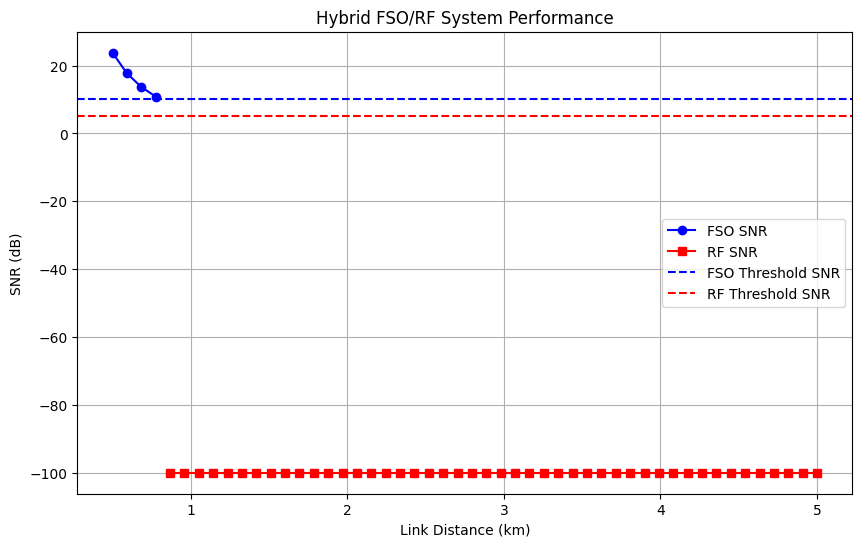

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(link_distances / 1000, fso_snr, 'b-o', label='FSO SNR')
plt.plot(link_distances / 1000, rf_snr, 'r-s', label='RF SNR')
plt.axhline(y=threshold_snr_fso, color='b', linestyle='--', label='FSO Threshold SNR')
plt.axhline(y=threshold_snr_rf, color='r', linestyle='--', label='RF Threshold SNR')
plt.xlabel('Link Distance (km)')
plt.ylabel('SNR (dB)')
plt.title('Hybrid FSO/RF System Performance')
plt.legend()
plt.grid(True)
plt.show()